### Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn import cluster, manifold
from sklearn.cluster import cluster_optics_dbscan
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from umap.umap_ import UMAP
from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm
import seaborn as sns


### Data Preprocessing

In [74]:
data = pd.read_csv('../data/water_potability.csv')
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### NULLS

In [75]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [76]:
data[data.isnull().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [77]:
data['ph'].fillna((data['ph'].mean()), inplace=True)
data['Sulfate'].fillna((data['Sulfate'].mean()), inplace=True)
data['Trihalomethanes'].fillna((data['Trihalomethanes'].mean()), inplace=True)
data_cleaned = data

In [78]:
data_cleaned.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [79]:
data_cleaned.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Features

In [80]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [81]:
X = data_cleaned.drop(columns=['Potability'])


In [82]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


### Outliers

In [83]:
data_minmax = MinMaxScaler().fit_transform(X.values)
pca = PCA(0.95, whiten=True)
data_pca = pca.fit_transform(X.values) 

In [84]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_pca)
scores = lof.negative_outlier_factor_

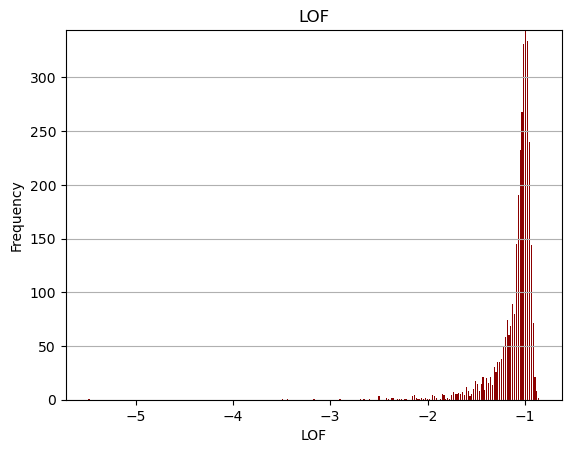

In [85]:
def plot_hist(X: pd.DataFrame, title: str) -> None:
    """ Funcion que genera un grafico de los valores de LOF del dataset """
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.65, color='darkred')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    
plot_hist(scores, 'LOF')



In [86]:
# Dado el grafico anterior, diremos que un umbral de corte sera aproximadamente -1.85
def lof_threshold(v: float, scores: np.ndarray) -> float:
    ''' Retorna la contaminacion del medio '''
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold 

lof_threshold(-2.5, scores) # Contaminacion del medio



0.0027472527472527475

In [87]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0027472527472527475)
labels = lof.fit_predict(X.values)

# Obtenemos los indices de los datos que son inliners
indices = list(np.where(labels==1)[0])

# Eliminamos los outliers del dataset 'data', filtrando el dataset solo con los datos
# que no son inliners (label = 1)
X = X.iloc[indices]


In [88]:
print(X.shape)

(3267, 9)


### Clustering
#### Normalization


In [89]:
X_ = MinMaxScaler().fit_transform(X.values)


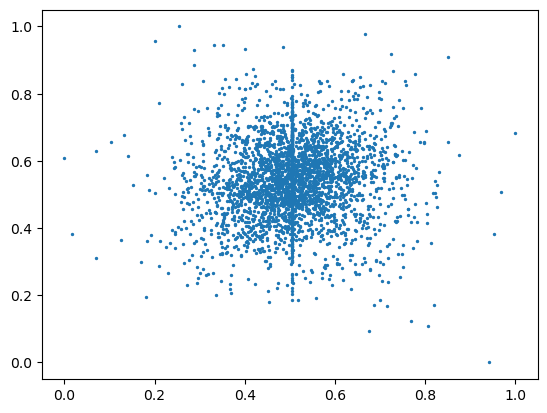

In [90]:
plt.scatter(X_[:, 0], X_[:, 1], s=2)
plt.show()

In [91]:
columns_data = data_cleaned.drop(columns='Potability').columns

In [92]:
columns_data

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [93]:
weights = {
    'Solids': 0.15,
    'Conductivity': 0.15,
    'Turbidity': 0.15,
    'Hardness': 0.15,
    'Sulfate': 0.1,
    'Trihalomethanes': 0.1,
    'Chloramines': 0.1,
    'ph': 0.05,
    'Organic_carbon': 0.05
}

X_df = pd.DataFrame(X_, columns=columns_data)  # replace your_column_names with the actual column names
X_df['contaminationLevel'] = X_df.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_df['contaminationLevel'] = scaler.fit_transform(X_df[['contaminationLevel']])
X_df['contaminationLevel'] = X_df['contaminationLevel'].round(1)
X_df['contaminationLevel'].value_counts().sort_index()

/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


contaminationLevel
0.0       1
0.1       8
0.2     104
0.3     393
0.4     818
0.5    1006
0.6     614
0.7     247
0.8      62
0.9      13
1.0       1
Name: count, dtype: int64

In [94]:
Y = X_df['contaminationLevel']

In [95]:
X_.shape

(3267, 9)

In [96]:
tsne_embed = manifold.TSNE(n_components=2, perplexity = 50, n_iter=500, n_iter_without_progress=150, n_jobs=10) 
projection_tsne = tsne_embed.fit_transform(X_, Y)


/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [97]:
umap_2d = UMAP(n_components = 2, min_dist = 1, n_neighbors= 50, n_jobs=8)
projection_umap = umap_2d.fit_transform(X_, Y)

In [98]:
def plot_embedding(X,title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in np.unique(Y):
        ax.scatter(
            *X[Y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.3,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-8:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
    ax.set_title(title)
    ax.axis("off")

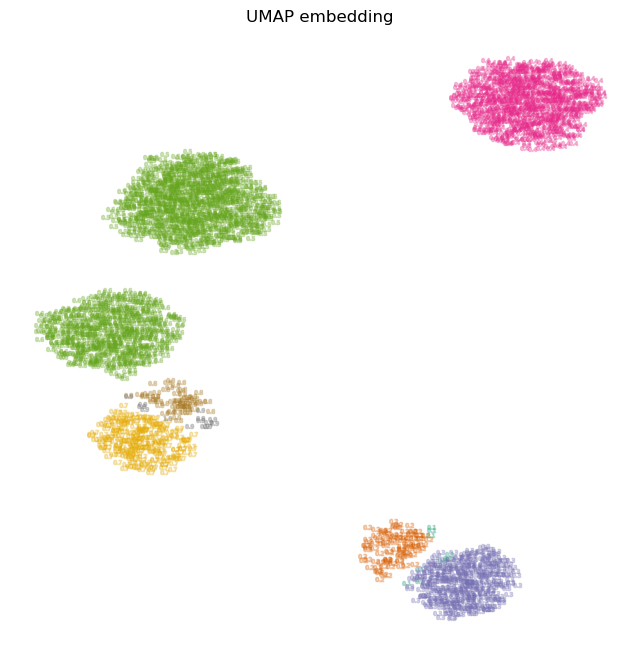

In [99]:
plot_embedding(projection_umap, "UMAP embedding")

In [100]:
range_n_clusters = [2,3,4,5,6,7,8,9]
# Esta funcion nos permitira graficar los silhoutte scores que toma cada dato segun al cluster que pertencen, segun 
# el valor de k que se escoja.
def function_k_means(X):
    for n_clusters in range_n_clusters:
        
        fig, ax = plt.subplots(figsize=(6, 12))
        

        ax.set_xlim([-0.1, 1.0])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4) # Utilizamos el algoritmo kmeans+ para escoger los centroides iniciales
        estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)

        cluster_labels = estimator.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "Para k= ",
            n_clusters,
            "Silhouette score promedio: ",
            silhouette_avg,
        )

        
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax.set_title("Silhouette plot")
        ax.set_xlabel("Silhouette scores")
        ax.set_ylabel("Cluster ID")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([]) 
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


        plt.suptitle(
            "Análisis Silhouette para k = %d"
            % n_clusters,
            fontsize=16,
            fontweight="bold",
        )

    plt.show()

Para k=  2 Silhouette score promedio:  0.53676987
Para k=  3 Silhouette score promedio:  0.68612015
Para k=  4 Silhouette score promedio:  0.74479973
Para k=  5 Silhouette score promedio:  0.73974496
Para k=  6 Silhouette score promedio:  0.6225871
Para k=  7 Silhouette score promedio:  0.56739205
Para k=  8 Silhouette score promedio:  0.46655065
Para k=  9 Silhouette score promedio:  0.44691625


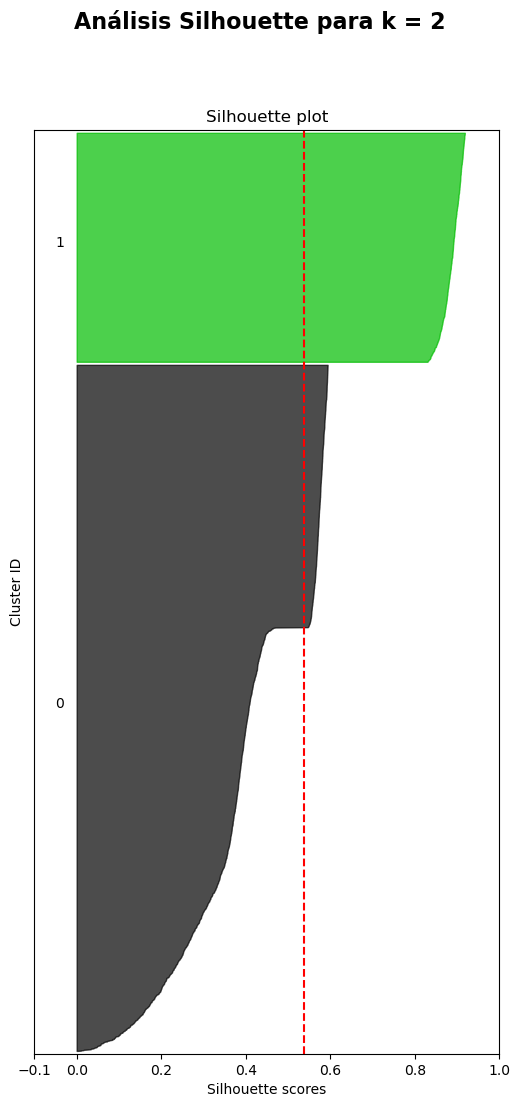

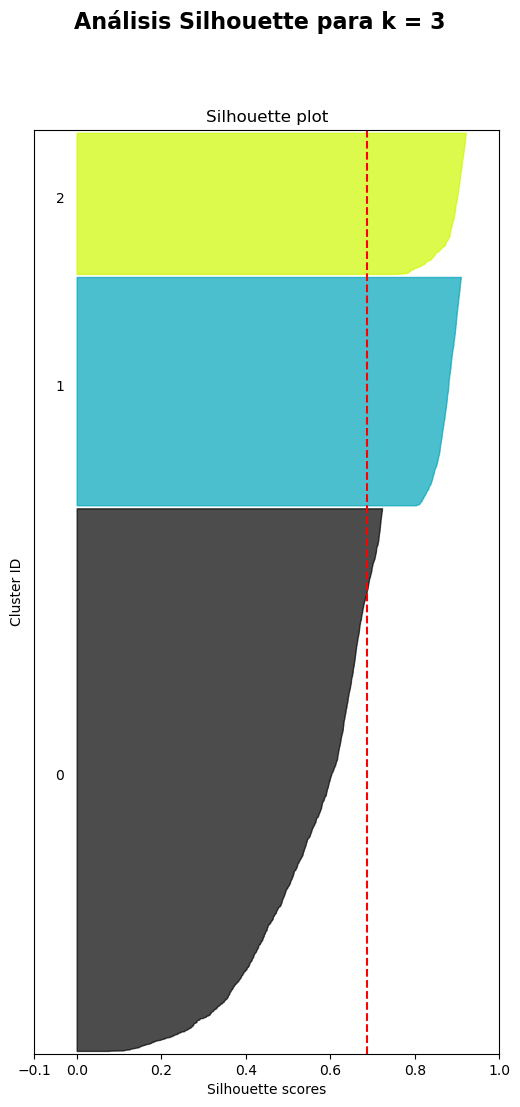

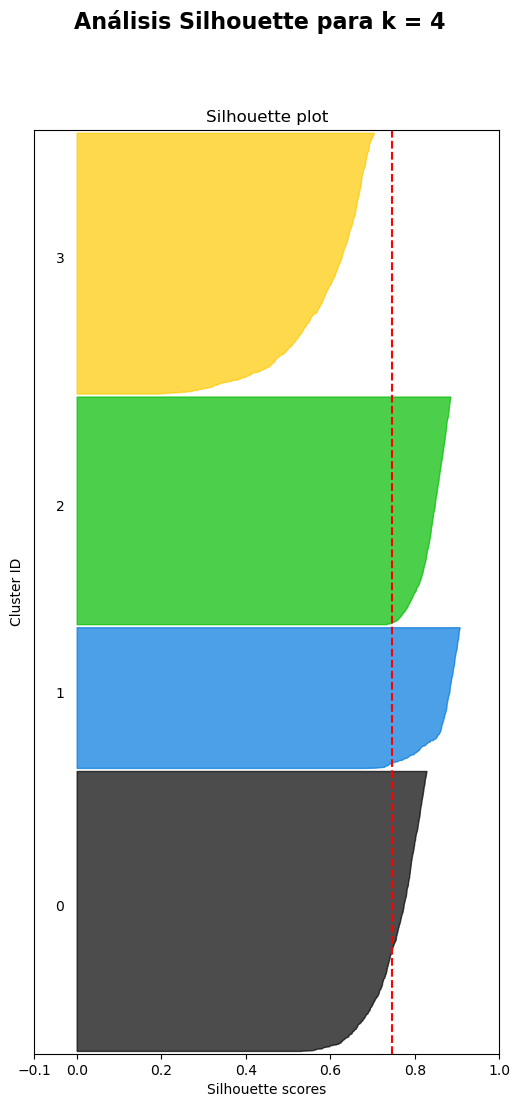

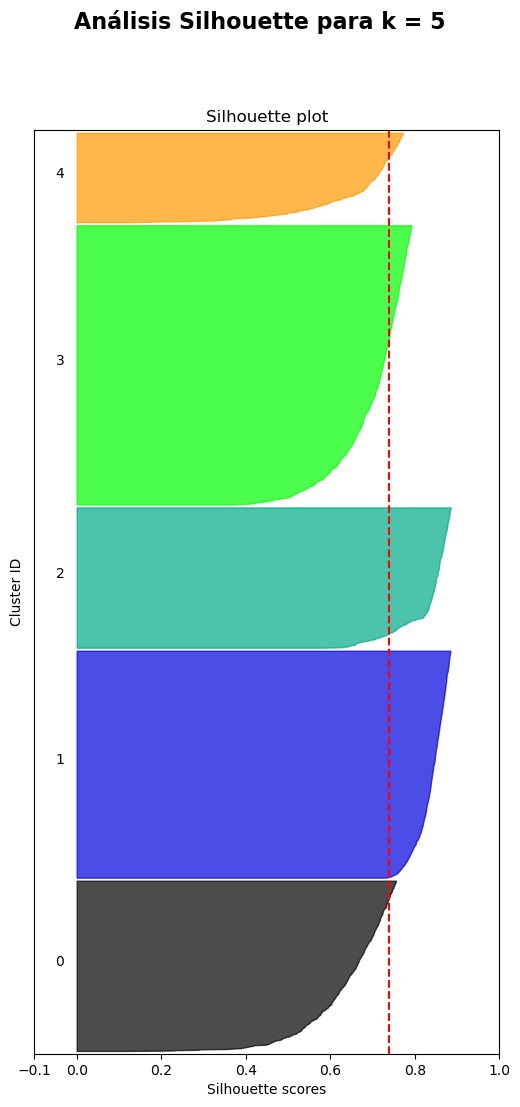

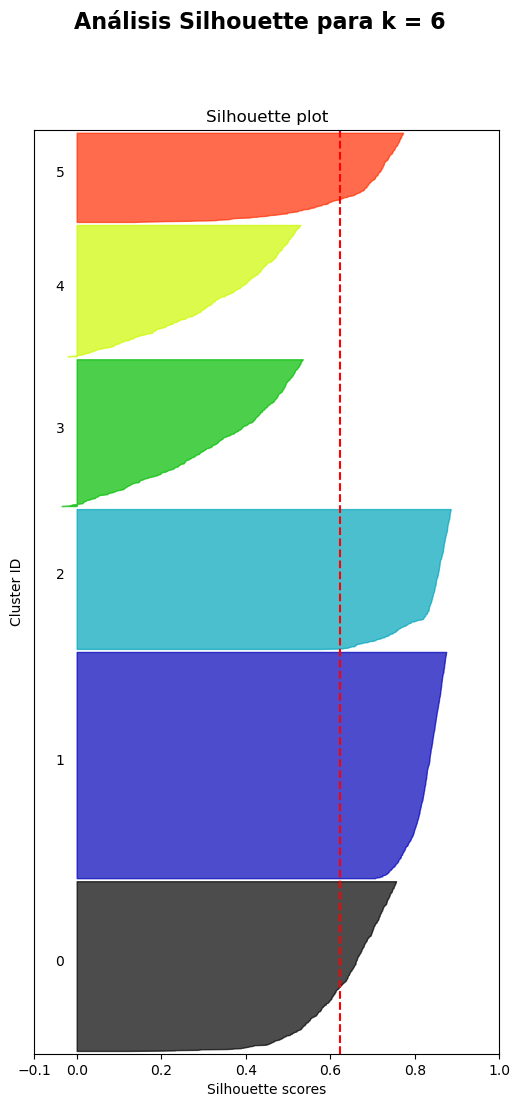

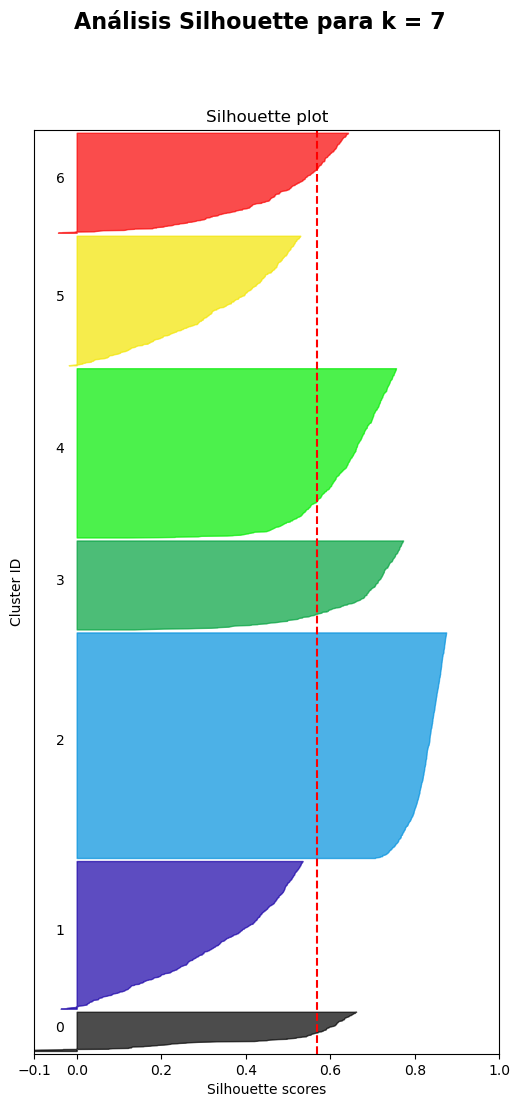

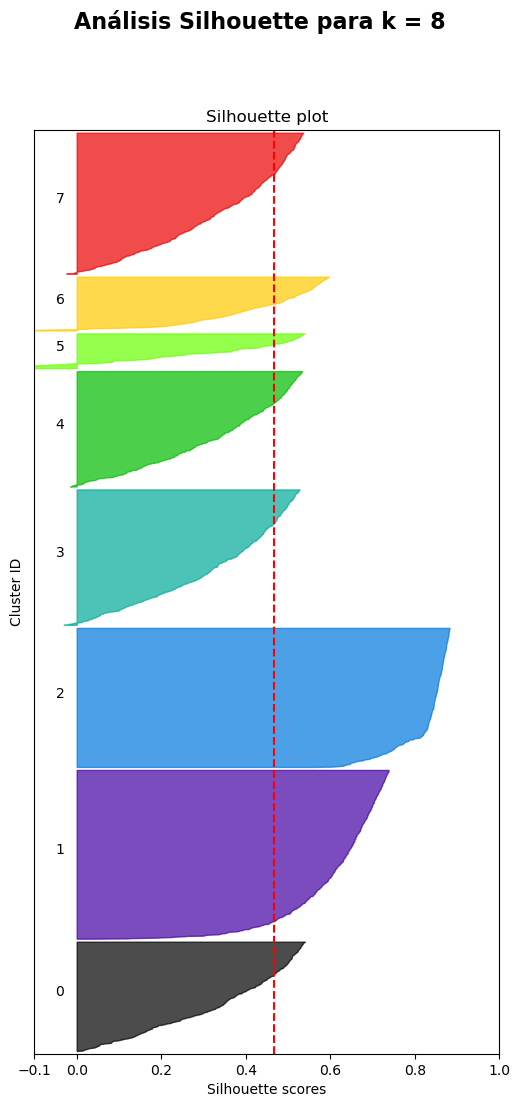

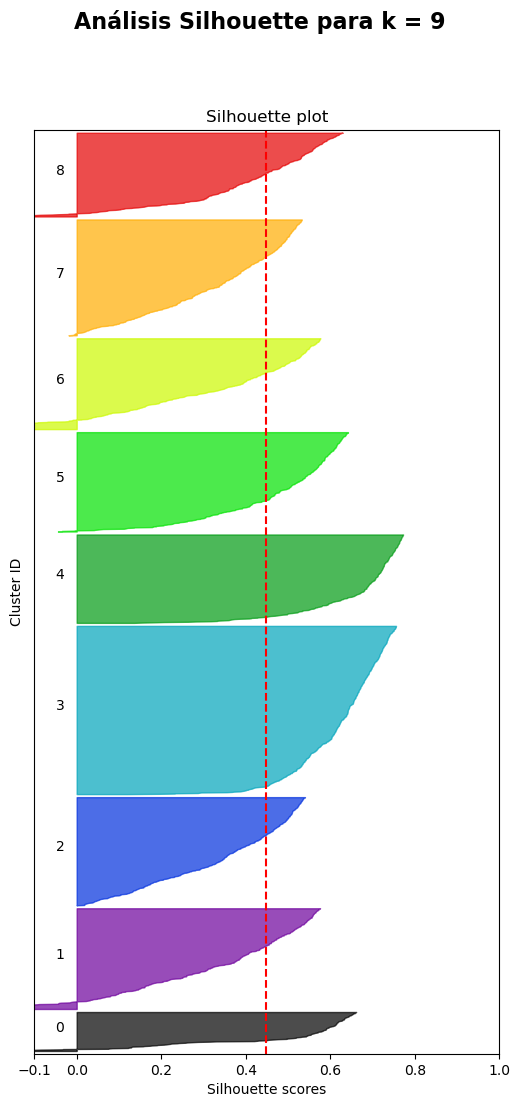

In [101]:
function_k_means(projection_umap)

Para k=  5 Silhouette score promedio:  0.6310486


In [102]:

colors = sns.color_palette("hls", 5)
def plot_clusters(X, k, title):
    # Perform clustering
    kmeans = KMeans(n_clusters=k)
    cluster = kmeans.fit_predict(X)

    # Plot the clusters
    plt.figure(figsize=(12, 5))
    for i in range(k):
        subset = X[cluster == i]
        plt.scatter(subset[:, 0], subset[:, 1], c=[colors[i]], label=f'Cluster {i}', s=8)
       
    plt.title(title)
    plt.legend()
    plt.show()

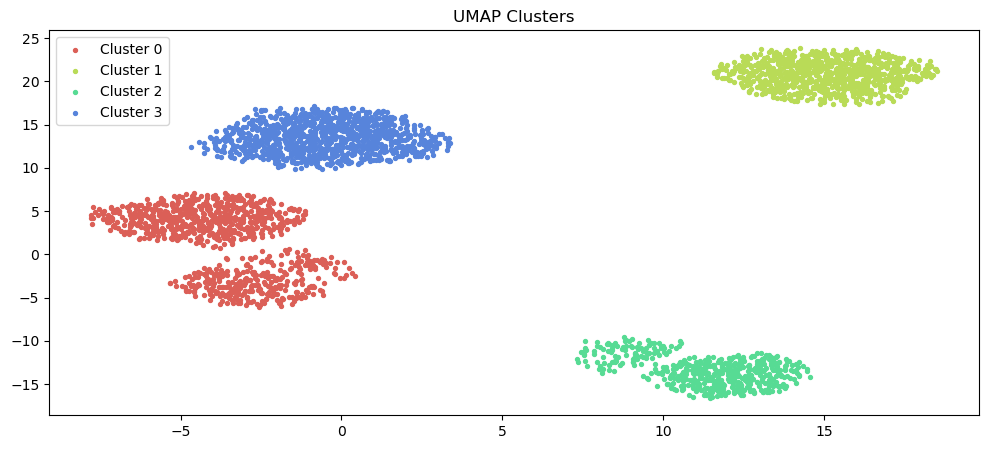

In [103]:
plot_clusters(projection_umap, 4, 'UMAP Clusters')


In [104]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

# Realiza el clustering
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(X_)

# Itera a través de las características y realiza ANOVA para cada una
for feature_index in range(X_.shape[1]):
    feature_to_test = X_[:, feature_index]
    grouped_data = [feature_to_test[cluster_labels == i] for i in range(5)]
    
    # Realiza el ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)
    
    # Imprime los resultados
    print(f"Característica {feature_index + 1}:")
    print(f"ANOVA F-statistic: {f_statistic}")
    print(f"ANOVA p-value: {p_value}")
    print()


Característica 1:
ANOVA F-statistic: 23.97054908039233
ANOVA p-value: 1.4352510996956105e-19

Característica 2:
ANOVA F-statistic: 19.741825001998784
ANOVA p-value: 4.506978417864313e-16

Característica 3:
ANOVA F-statistic: 871.7460784112806
ANOVA p-value: 0.0

Característica 4:
ANOVA F-statistic: 31.047928611878888
ANOVA p-value: 2.0741609121118184e-25

Característica 5:
ANOVA F-statistic: 23.195661150563726
ANOVA p-value: 6.273301759685533e-19

Característica 6:
ANOVA F-statistic: 821.455841700985
ANOVA p-value: 0.0

Característica 7:
ANOVA F-statistic: 125.37635455906987
ANOVA p-value: 1.0965342131697335e-99

Característica 8:
ANOVA F-statistic: 168.7952699849866
ANOVA p-value: 1.5602780427834875e-131

Característica 9:
ANOVA F-statistic: 623.3594038551225
ANOVA p-value: 0.0

